## Exploratory Analysis Data Center Angle

also installing the dependencies ‘triebeard’, ‘V8’, ‘clipr’, ‘clisymbols’, ‘fs’, ‘git2r’, ‘urltools’, ‘httpcode’, ‘ini’, ‘jsonld’, ‘desc’, ‘usethis’, ‘crul’, ‘gh’, ‘sessioninfo’

Warning message in install.packages("codemetar"):
“installation of package ‘V8’ had non-zero exit status”Warning message in install.packages("codemetar"):
“installation of package ‘jsonld’ had non-zero exit status”Warning message in install.packages("codemetar"):
“installation of package ‘codemetar’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [4]:
library(ggplot2)
library(jsonlite)
library(plyr)
library(scales)
library(dplyr)
library(stringr)
library(RColorBrewer)
library(httr)
library(tidyr)
library(psych)
source("../functions/graph_functions.r")


subject,year,count,percentage,sum
copper,2006,32,79,5255
silver,2006,4176,79,5255


In [29]:
# load("../data/2018-10-03_source_datacite-crossref_meta.Rda",verbose=TRUE)
load("../data/2018-10-28_source_datacite-crossref_meta.Rda",verbose=TRUE)
print((meta$registrants$years[1]))

registrants <- meta$registrants
citation_types <- meta$`citation-types`
relation_types <- meta$`relation-types`
pairings <- meta$pairings



Loading objects:
  meta
[[1]]
    id title    sum
1 2016  2016  95308
2 2017  2017  10793
3 2018  2018 108948



In [30]:
flat_year<-function(years){
    x <- filter(years[[1]], title == "2017")
    return(x$sum)
}
flat_year_8<-function(years){
    x <- filter(years[[1]], title == "2018")
    return(x$sum)
}

registrants %>%  mutate(`2017` = "",`2018` = "" ) 

for (row in 1:nrow(registrants)) {
    first <- flat_year(registrants$years[row])
    second <- flat_year_8(registrants$years[row])
    if(length(first) == 0){
        first<-0
    }
    if(length(second) == 0){
        second<-0
    }        
        
    registrants$`2017`[row] <- first
    registrants$`2018`[row] <- second
}

registrants<-registrants %>% 
    mutate(m=((`2018`-`2017`)/(10000)), client=title, `2018`=`2018`,`2017`=`2017` ) %>% 
    filter(startsWith(title, "datacite"))
# head(registrants,5)


id,title,count,years,2017,2018
datacite.bl.ccdc,datacite.bl.ccdc,215049,"2016 , 2017 , 2018 , 2016 , 2017 , 2018 , 95308 , 10793 , 108948",,
datacite.gesis.icpsr,datacite.gesis.icpsr,183574,"2018 , 2018 , 183574",,
datacite.dk.gbif,datacite.dk.gbif,121258,"2015 , 2016 , 2017 , 2018 , 2015 , 2016 , 2017 , 2018 , 6287 , 2123 , 677 , 112171",,
crossref.78,crossref.78,95800,"2011 , 2013 , 2014 , 2015 , 2016 , 2017 , 2018 , 2011 , 2013 , 2014 , 2015 , 2016 , 2017 , 2018 , 1 , 4 , 4 , 29 , 24391, 6168 , 65203",,
crossref.311,crossref.311,70885,"2013 , 2014 , 2015 , 2016 , 2017 , 2018 , 2013 , 2014 , 2015 , 2016 , 2017 , 2018 , 6 , 18 , 98 , 19274, 2648 , 48841",,
datacite.tib.pangaea,datacite.tib.pangaea,59178,"2016 , 2017 , 2018 , 2016 , 2017 , 2018 , 19509, 20166, 19503",,
crossref.316,crossref.316,59067,"2013 , 2014 , 2016 , 2017 , 2018 , 2013 , 2014 , 2016 , 2017 , 2018 , 1 , 82 , 25971, 2512 , 30501",,
crossref.4913,crossref.4913,58882,"2015 , 2016 , 2017 , 2018 , 2015 , 2016 , 2017 , 2018 , 266 , 192 , 73 , 58351",,
crossref.292,crossref.292,45909,"2016 , 2017 , 2018 , 2016 , 2017 , 2018 , 18352, 2225 , 25332",,
crossref.297,crossref.297,44955,"2013 , 2014 , 2015 , 2016 , 2017 , 2018 , 2013 , 2014 , 2015 , 2016 , 2017 , 2018 , 15 , 20 , 78 , 3735 , 5864 , 35243",,


In [31]:

load("../data/2018-10-11_datacite_registrants.Rda",verbose=TRUE)
registrants <- registrants %>% rowwise() %>% left_join(datacite_reg)

# head(registrants)

Loading objects:
  datacite_reg


Joining, by = "id"


   vars n mean      sd median trimmed  mad min   max range skew kurtosis
X1    1 9 3516 7179.44      2    3516 2.97   0 20166 20166 1.42     0.37
        se
X1 2393.15
   vars n     mean      sd median  trimmed     mad  min    max  range skew
X1    1 9 48725.89 68212.6   6421 48725.89 7582.02 1307 183574 182267 0.85
   kurtosis       se
X1    -1.03 22737.53


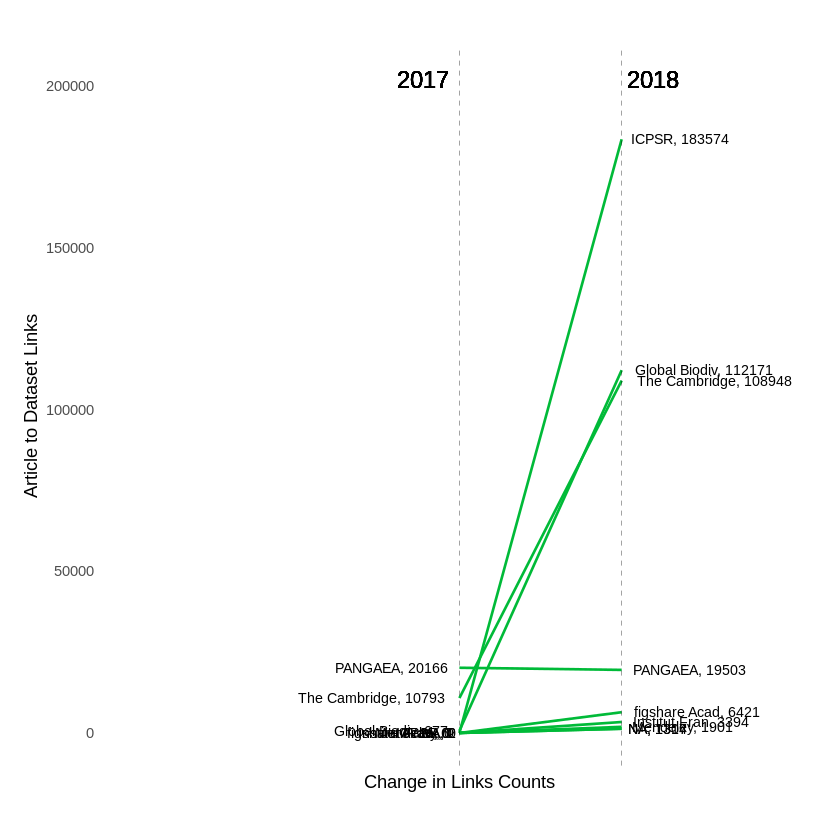

In [32]:

plot_slopegraph(head(registrants,15))

   vars n     mean       sd median  trimmed      mad min    max  range skew
X1    1 7 89185.14 107557.8   9682 89185.14 13734.81 418 241222 240804 0.31
   kurtosis       se
X1    -2.04 40653.04


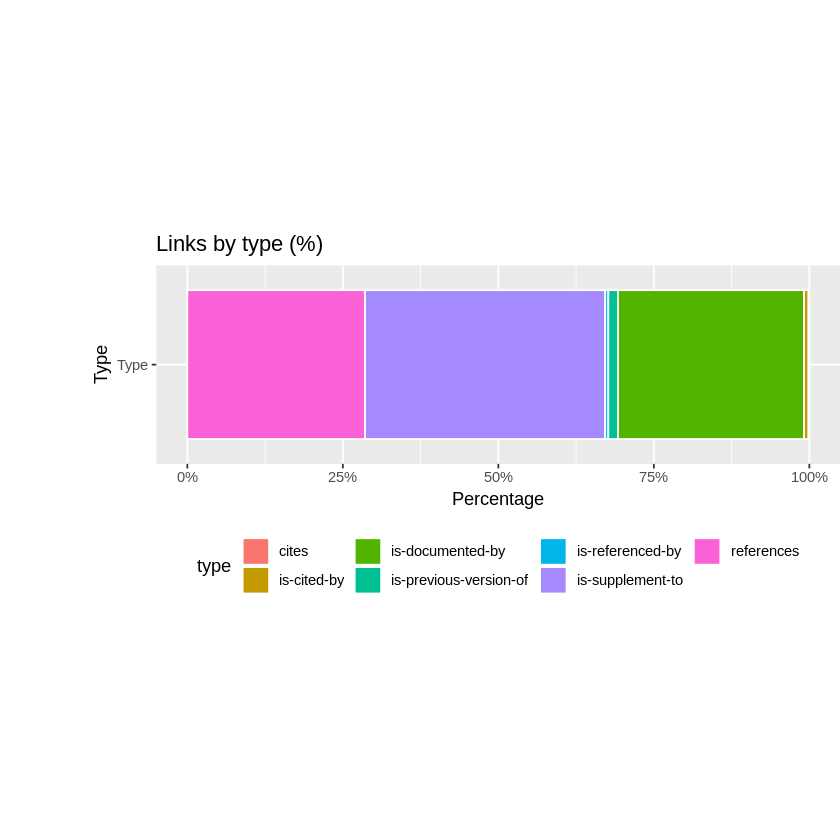

In [33]:
types <- relation_types %>%   
        mutate(total = sum(count), percentage = (count/total)*100, type=title, column="Type") %>%
        arrange(desc(total))


hundred_plot(head(types,7),"Links by type (%)",TRUE)


   vars n   mean sd median trimmed mad    min    max range skew kurtosis se
X1    1 1 624723 NA 624723  624723   0 624723 624723     0   NA       NA NA


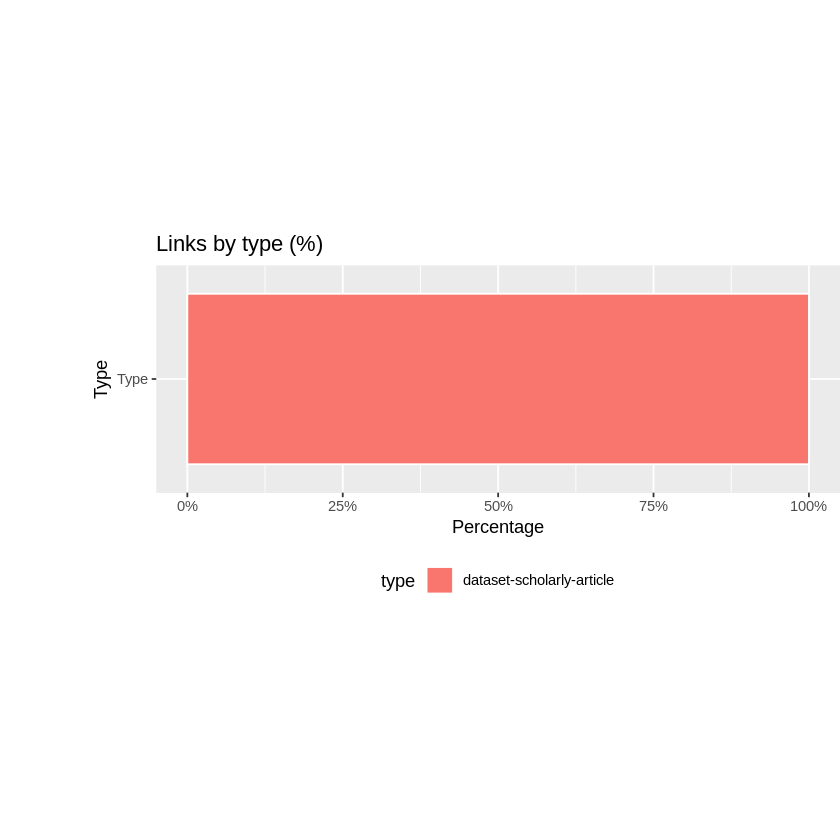

In [34]:
citation <- citation_types %>%   
        mutate(total = sum(count), percentage = (count/total)*100, type=title, column="Type") %>%
        arrange(desc(total))


hundred_plot(head(citation,7),"Links by type (%)",TRUE)



Loading objects:
  meta
   vars n     mean       sd median  trimmed      mad  min    max  range skew
X1    1 7 117212.6 225054.3  42153 117212.6 32589.03 1771 624723 622952 1.58
   kurtosis       se
X1     0.72 85062.53


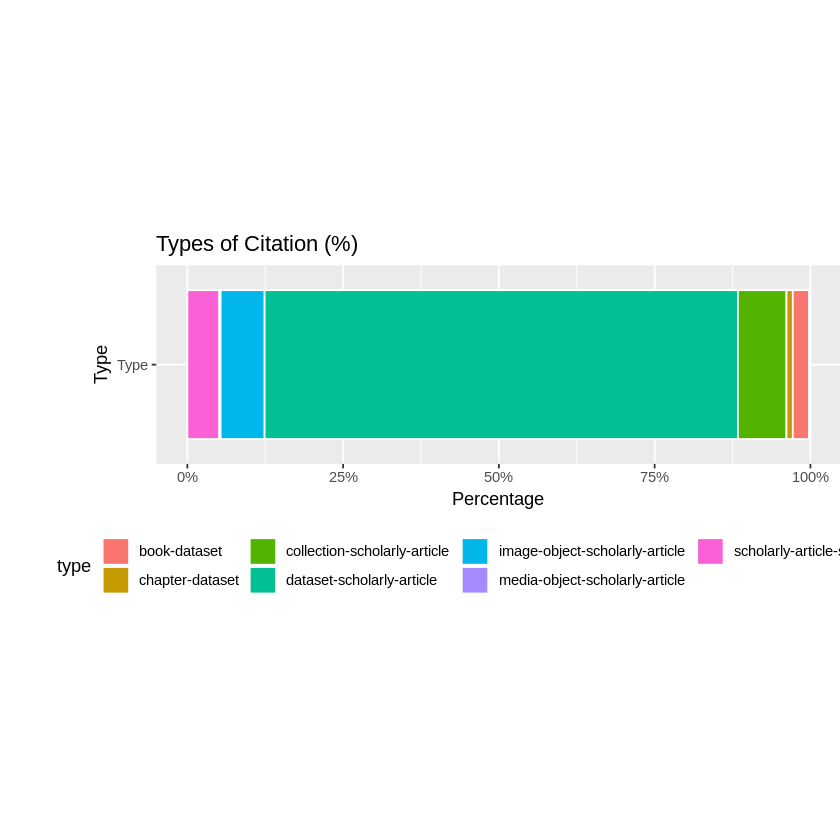

In [35]:
load("../data/2018-10-28_source_datacite_all_citations_types_meta.Rda",verbose=TRUE)
citation_types <- meta$`citation-types`

types <- citation_types %>%   
        mutate(total = sum(count), percentage = (count/total)*100, type=title, column="Type") %>%
        arrange(desc(percentage))
hundred_plot(head(types,7),"Types of Citation (%)",TRUE)




In [36]:
pairings<-pairings %>% unnest(registrants)


In [37]:
pairings<-pairings %>% filter(startsWith(title, "datacite")) %>% mutate(datacenter=as.factor(title),publisher=as.factor(id1))  %>%   
arrange(desc(sum))
head(pairings,10)
summary(pairings$count)

id,title,count,id1,title1,sum,datacenter,publisher
datacite.dk.gbif,datacite.dk.gbif,121258,crossref.4913,crossref.4913,58866,datacite.dk.gbif,crossref.4913
datacite.bl.ccdc,datacite.bl.ccdc,215049,crossref.316,crossref.316,58463,datacite.bl.ccdc,crossref.316
datacite.bl.ccdc,datacite.bl.ccdc,215049,crossref.292,crossref.292,45719,datacite.bl.ccdc,crossref.292
datacite.dk.gbif,datacite.dk.gbif,121258,crossref.2258,crossref.2258,42066,datacite.dk.gbif,crossref.2258
datacite.bl.ccdc,datacite.bl.ccdc,215049,crossref.311,crossref.311,38299,datacite.bl.ccdc,crossref.311
datacite.bl.ccdc,datacite.bl.ccdc,215049,crossref.78,crossref.78,37508,datacite.bl.ccdc,crossref.78
datacite.gesis.icpsr,datacite.gesis.icpsr,183574,crossref.78,crossref.78,37264,datacite.gesis.icpsr,crossref.78
datacite.gesis.icpsr,datacite.gesis.icpsr,183574,crossref.179,crossref.179,28642,datacite.gesis.icpsr,crossref.179
datacite.gesis.icpsr,datacite.gesis.icpsr,183574,crossref.311,crossref.311,24913,datacite.gesis.icpsr,crossref.311
datacite.gesis.icpsr,datacite.gesis.icpsr,183574,crossref.297,crossref.297,20670,datacite.gesis.icpsr,crossref.297


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1330    1901   59178   81446  183574  215049 

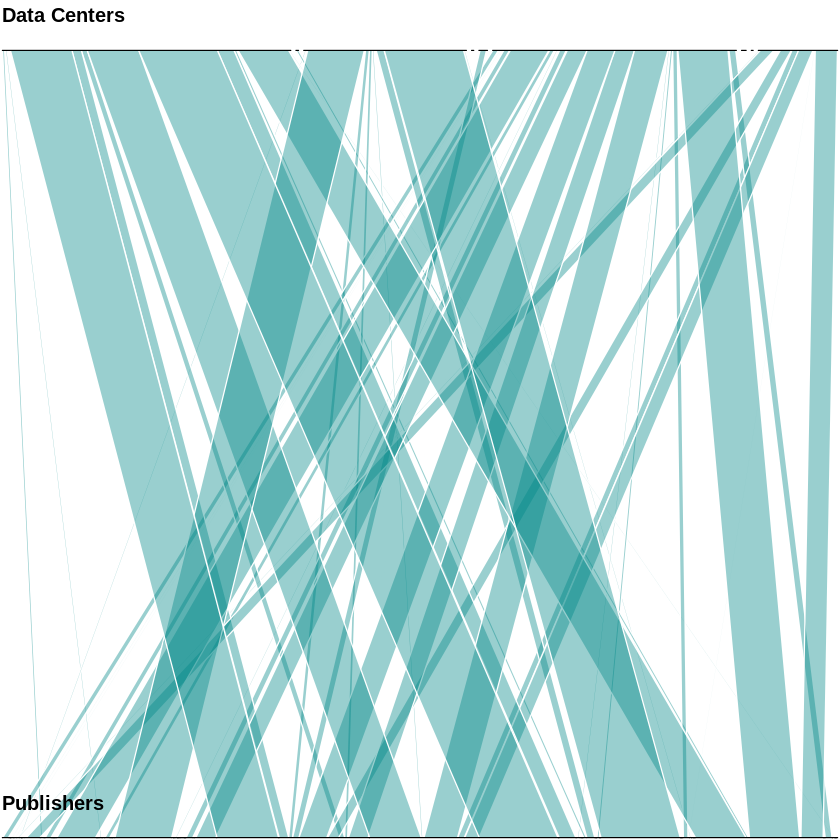

In [38]:
with(pairings, parallelset(datacenter, publisher,  freq=sum, col="#008888", alpha=0.4)) 

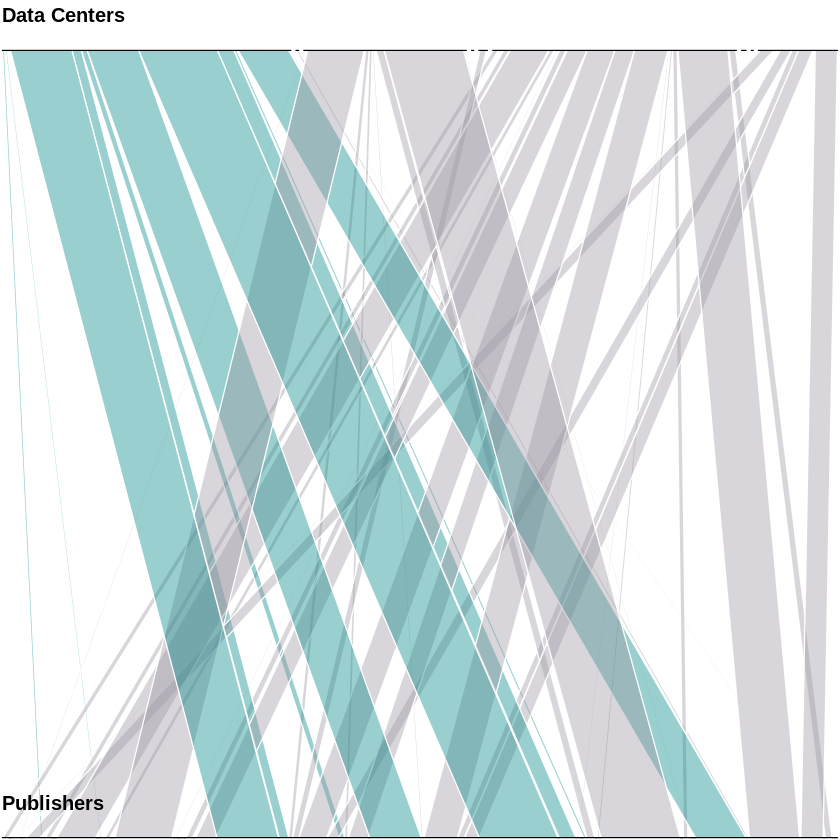

In [39]:
pairings_h <- pairings %>%
    mutate(highlighted = ifelse(datacenter=="datacite.bl.ccdc","Yes","No")) 
    

myt <- within(pairings_h, {
  highlighted <- factor(highlighted, levels=c("Yes","No"))
  color <- ifelse(highlighted=="Yes","#008888","#9e99a3")
})
with(myt, parallelset(datacenter, publisher,  freq=sum, col=color, alpha=0.4)) 

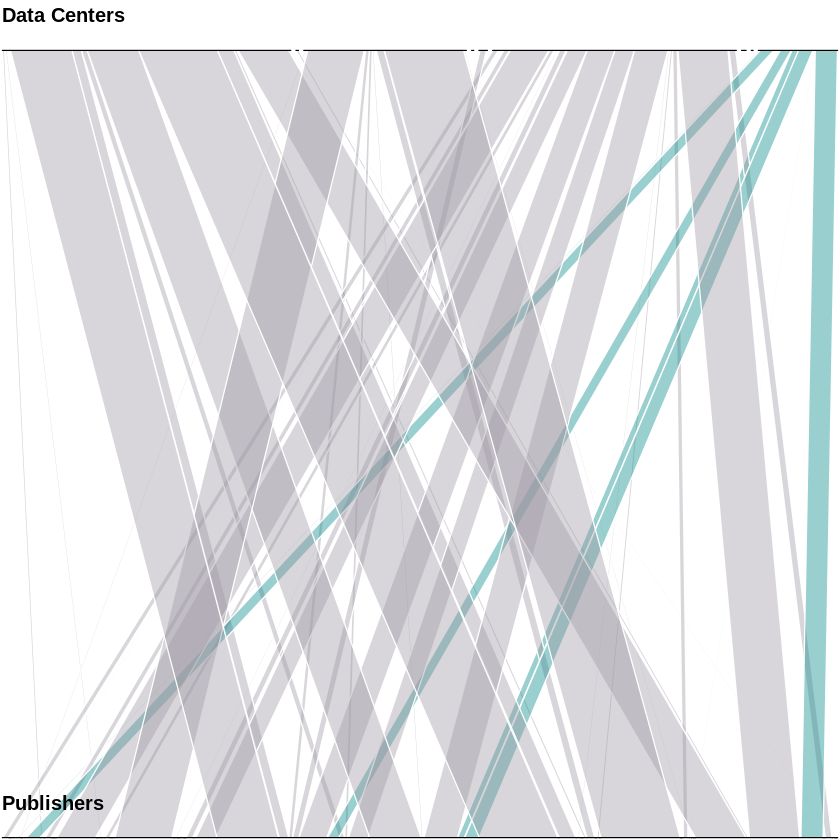

In [40]:
pairings_h <- pairings %>%
    mutate(highlighted = ifelse(datacenter=="datacite.tib.pangaea","Yes","No")) 
    

myt <- within(pairings_h, {
  highlighted <- factor(highlighted, levels=c("Yes","No"))
  color <- ifelse(highlighted=="Yes","#008888","#9e99a3")
})
with(myt, parallelset(datacenter, publisher,  freq=sum, col=color, alpha=0.4)) 

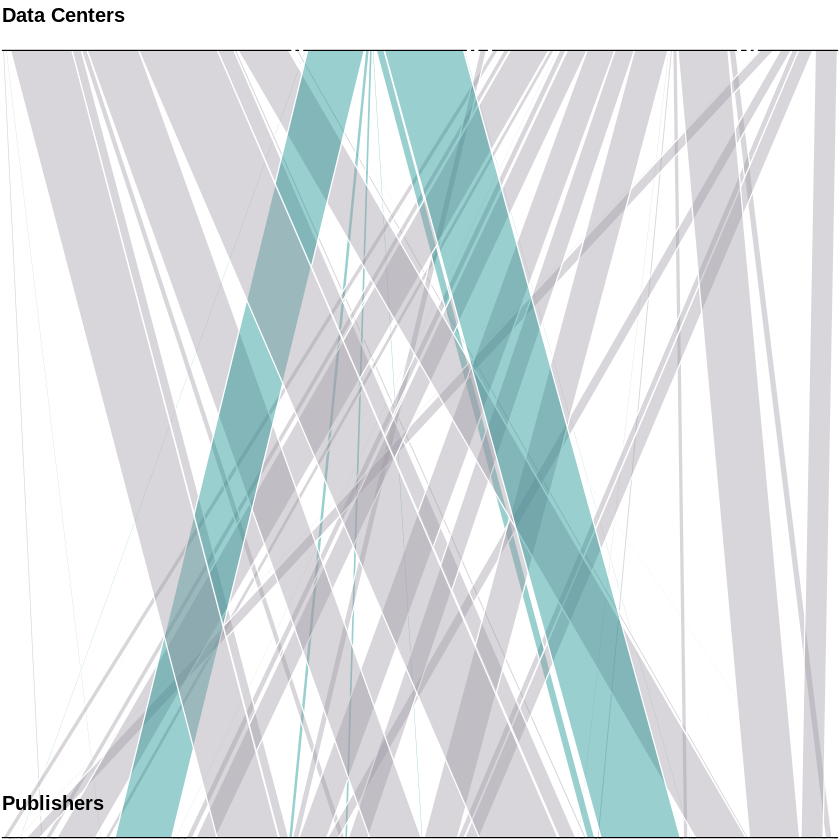

In [41]:
pairings_h <- pairings %>%
    mutate(highlighted = ifelse(datacenter=="datacite.dk.gbif","Yes","No")) 
    

myt <- within(pairings_h, {
  highlighted <- factor(highlighted, levels=c("Yes","No"))
  color <- ifelse(highlighted=="Yes","#008888","#9e99a3")
})
with(myt, parallelset(datacenter, publisher,  freq=sum, col=color, alpha=0.4)) 

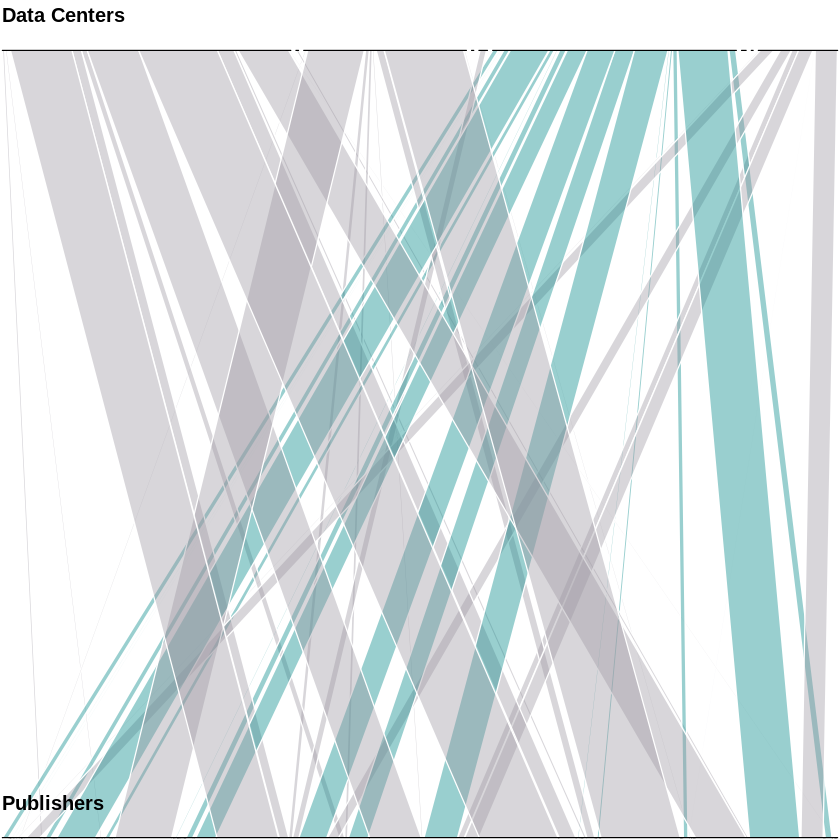

In [42]:
pairings_h <- pairings %>%
    mutate(highlighted = ifelse(datacenter=="datacite.gesis.icpsr","Yes","No")) 
    

myt <- within(pairings_h, {
  highlighted <- factor(highlighted, levels=c("Yes","No"))
  color <- ifelse(highlighted=="Yes","#008888","#9e99a3")
})
with(myt, parallelset(datacenter, publisher,  freq=sum, col=color, alpha=0.4)) 

In [43]:
load("../data/2018-10-28_source_datacite-crossref_meta.Rda",verbose=TRUE)
print((meta$registrants$years[1]))

registrants <- meta$registrants
citation_types <- meta$`citation-types`
relation_types <- meta$`relation-types`
pairings <- meta$pairings


Loading objects:
  meta
[[1]]
    id title    sum
1 2016  2016  95308
2 2017  2017  10793
3 2018  2018 108948



In [44]:
registrants<-registrants %>% unnest(`years`) %>% filter(id1>"2008") %>% mutate(year=as.factor(id1),sum=as.integer(sum))

x<-group_by(registrants, year) %>% summarise(total = sum(sum))

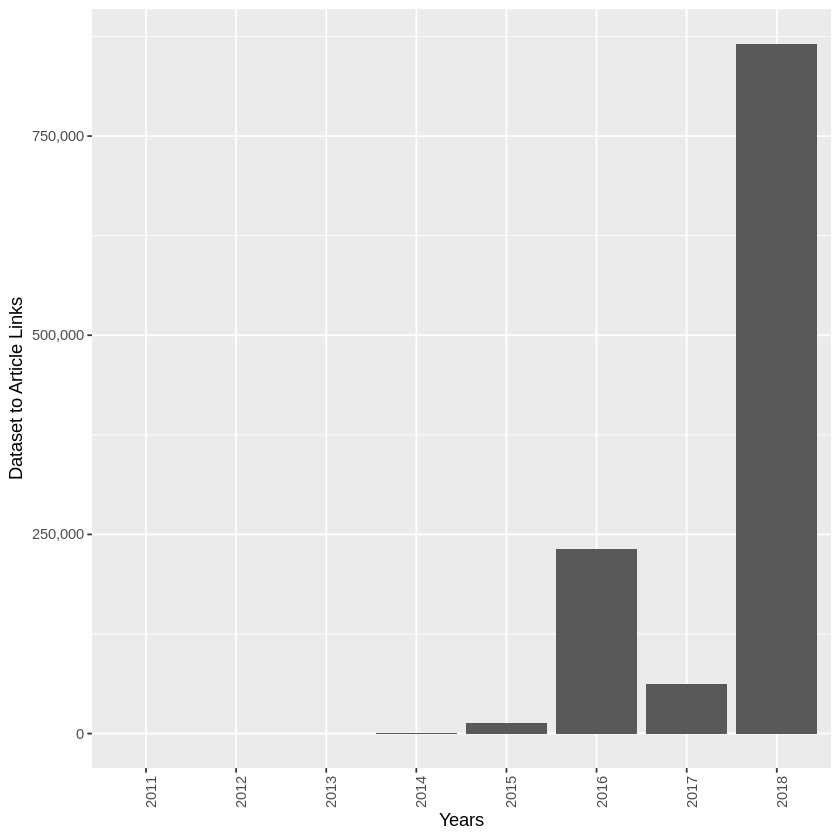

In [45]:
p<-ggplot(x, aes(x=year,y=total)) + geom_bar(stat="identity") + scale_y_continuous(label=comma) +
                      labs(x="Years", y="Dataset to Article Links")  # Axis labels


p + theme( 
              axis.text.x = element_text(angle = 90, hjust = 1)) 


In [13]:
codemeta <- fromJSON("../codemeta.json")
codemeta$identifier

[1] ""

In [9]:
library(knitr)

In [11]:
kable(codemeta, "")



|x                                                                          |
|:--------------------------------------------------------------------------|
|https://raw.githubusercontent.com/codemeta/codemeta/master/codemeta.jsonld |

|x                  |
|:------------------|
|SoftwareSourceCode |

|x  |
|:--|
|   |

|@id                                  |@type  |name            |givenName |familyName |mustBeCited |isMaintainer |isRightsHolder |
|:------------------------------------|:------|:---------------|:---------|:----------|:-----------|:------------|:--------------|
|http://orcid.org/0000-0003-3484-6875 |person |Garza, Kristian |Kristian  |Garza      |TRUE        |TRUE         |TRUE           |

|x  |
|:--|
|   |

|x                                            |
|:--------------------------------------------|
|https://github.com/datacite/metadata-reports |

|x        |
|:--------|
|software |

|x          |
|:----------|
|2018-05-19 |

|x          |
|:----------|
|2018-10-05